In [136]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

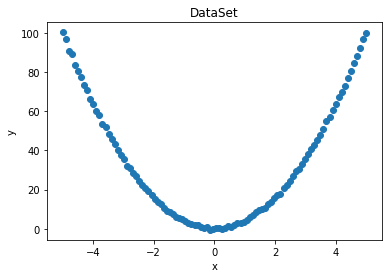

In [137]:
# Data 
x = torch.unsqueeze(torch.linspace(-5,5,100),dim=1) # unsqueeze let output dim = 1
y = 4*x*x + 0.45*torch.randn(x.size())
# print(x.size()) = 100,1 
# print(x)


plt.title('DataSet')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [138]:
# Hyper-parameters
InputSize = 1
OutputSize = 1
Epochs = 200
LearningRate = 0.5

Model_1 = nn.Sequential(
    nn.Linear(InputSize,12),
    nn.ReLU(),
    nn.Linear(12,OutputSize)
)

optimizer = torch.optim.Adam(Model_1.parameters(),lr=LearningRate)
Loss_func = nn.MSELoss()

print(Model_1)

Sequential(
  (0): Linear(in_features=1, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)


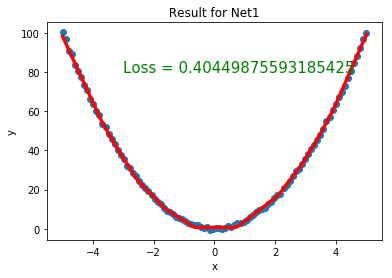

In [139]:
for epoch in range(Epochs):
    output = Model_1(x)
    
    loss = Loss_func(output,y)
    # Update 
    # print('loss = {l}'.format(l=loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Show our Result 
plt.title(' Result for Net1 ')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x.numpy(),y.numpy())
plt.plot(x.numpy(),output.data.numpy(),c='red',lw=3.4)
plt.text(-3,80,'Loss = {l}'.format(l=loss.item()),fontdict={'size':15, 'color':'green'})
plt.show()

# The most important thing is to save our model
# There two way to save model on pytorch

torch.save(Model_1,'Model_1.pkl')                  # Way 1 : Save the net includeing the code 
torch.save(Model_1.state_dict(),'Model_1_par.pkl') # Way 2 : Save the net only include parameters

Sequential(
  (0): Linear(in_features=1, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)


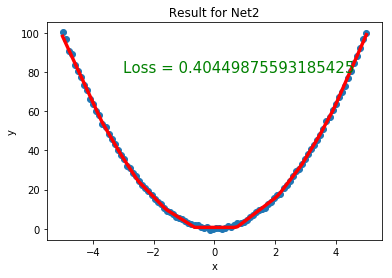

In [140]:
def Loading_NeuralNetwork():
    # Load all neural network 
    Model_2 = torch.load('Model_1.pkl')
    print(Model_2)
    Output2 = Model_2(x)  # input x data to try our model
    
    # Show our Result 
    plt.title(' Result for Net2 ')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x.numpy(),y.numpy())
    plt.plot(x.numpy(),Output2.data.numpy(),c='red',lw=3.4)
    plt.text(-3,80,'Loss = {l}'.format(l=loss.item()),fontdict={'size':15, 'color':'green'})
    plt.show()
    
Loading_NeuralNetwork() # Model_2 has loaded Model_1

Sequential(
  (0): Linear(in_features=1, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)


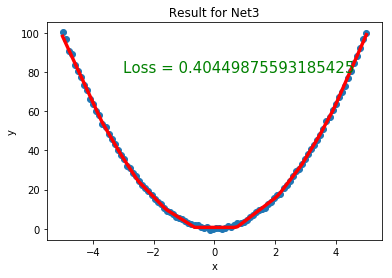

In [143]:
def Loading_NN_Parameter():
    # First build a same-structure model
    Model_3 = nn.Sequential(
        nn.Linear(InputSize,12),
        nn.ReLU(),
        nn.Linear(12,OutputSize) 
    )
    print(Model_3)
    Model_3.load_state_dict(torch.load('Model_1_par.pkl')) # Only load the parameters
    Output3 = Model_3(x)
    
    # Show our Result 
    plt.title(' Result for Net3 ')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x.numpy(),y.numpy())
    plt.plot(x.numpy(),Output3.data.numpy(),c='red',lw=3.4)
    plt.text(-3,80,'Loss = {l}'.format(l=loss.item()),fontdict={'size':15, 'color':'green'})
    plt.show()

Loading_NN_Parameter()